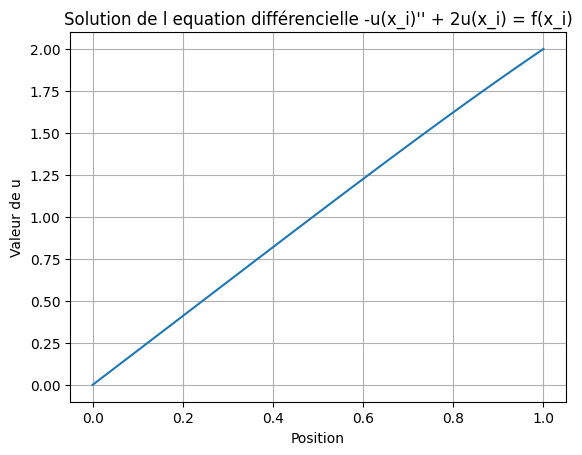

In [99]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0
Nx = 40
dx = L / Nx

c = 0.1
h_square = dx**2
A = np.zeros((Nx+1, Nx+1))
np.fill_diagonal(A[1:], -1/h_square)
np.fill_diagonal(A[:, 1:], -1/h_square)
np.fill_diagonal(A, 2/h_square + c)
A[0, 0] = 1.0
A[0, 1] = 0.0
A[-1, -1] = 1.0
A[-1, -2] = 0.0

u_0 = 0.0
u_L = 2.0

f = lambda  x:  x**2


x = np.linspace(0, L, Nx+1)
b =f(x)
b[0]=u_0
b[-1]=u_L

u = np.linalg.solve(A, b)

plt.plot(x, u)
plt.title('Solution de l equation différencielle -u(x_i)\'\' + 2u(x_i) = f(x_i)')
plt.xlabel('Position')
plt.ylabel('Valeur de u')
plt.grid(True)
plt.show()


In [100]:
print(A)

[[ 1.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
   0.0000e+00]
 [-1.6000e+03  3.2001e+03 -1.6000e+03 ...  0.0000e+00  0.0000e+00
   0.0000e+00]
 [ 0.0000e+00 -1.6000e+03  3.2001e+03 ...  0.0000e+00  0.0000e+00
   0.0000e+00]
 ...
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  3.2001e+03 -1.6000e+03
   0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ... -1.6000e+03  3.2001e+03
  -1.6000e+03]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
   1.0000e+00]]


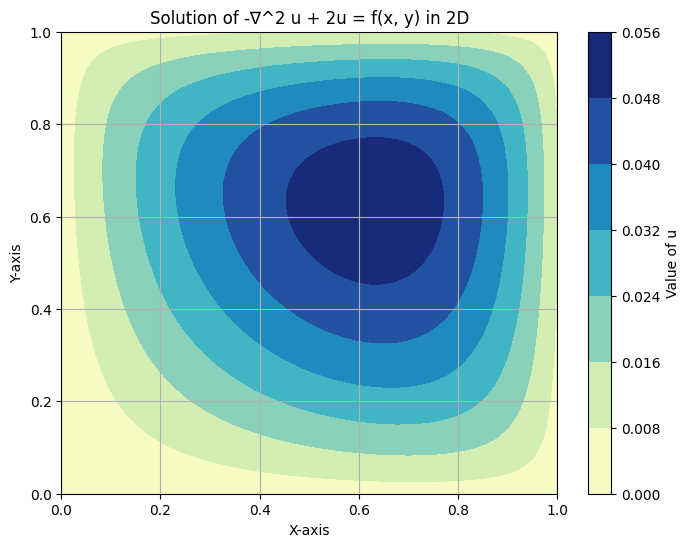

In [101]:
import numpy as np
import matplotlib.pyplot as plt

Lx = 1.0
Ly = 1.0
Nx = 40
Ny = 40
dx = Lx / Nx
dy = Ly / Ny

c = 0.1
h_square_x = dx**2
h_square_y = dy**2

A = np.zeros(((Nx + 1) * (Ny + 1), (Nx + 1) * (Ny + 1)))

for i in range((Nx + 1) * (Ny + 1)):
    A[i, i] = 2 * (1 / h_square_x + 1 / h_square_y) + c

for i in range((Nx + 1) * (Ny + 1) - 1):
    if (i + 1) % (Nx + 1) != 0:
        A[i, i + 1] = -1 / h_square_x
        A[i + 1, i] = -1 / h_square_x

for i in range((Nx + 1) * (Ny + 1) - (Nx + 1)):
    A[i, i + (Nx + 1)] = -1 / h_square_y
    A[i + (Nx + 1), i] = -1 / h_square_y

u_0 = 0.0
u_L = 2.0

f = lambda x, y: x**2 + y**2

x = np.linspace(0, Lx, Nx + 1)
y = np.linspace(0, Ly, Ny + 1)
X, Y = np.meshgrid(x, y)
b = f(X, Y).flatten()
b[:Nx + 1] = u_0
b[-(Nx + 1):] = u_L
b[::(Nx + 1)] = u_0
b[Nx::(Nx + 1)] = u_L

u = np.linalg.solve(A, b).reshape((Ny + 1, Nx + 1))

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u, cmap='YlGnBu')
plt.colorbar(label='Value of u')
plt.title('Solution of -∇^2 u + 2u = f(x, y) in 2D')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


In [102]:
print(A)

[[ 6400.1 -1600.      0.  ...     0.      0.      0. ]
 [-1600.   6400.1 -1600.  ...     0.      0.      0. ]
 [    0.  -1600.   6400.1 ...     0.      0.      0. ]
 ...
 [    0.      0.      0.  ...  6400.1 -1600.      0. ]
 [    0.      0.      0.  ... -1600.   6400.1 -1600. ]
 [    0.      0.      0.  ...     0.  -1600.   6400.1]]


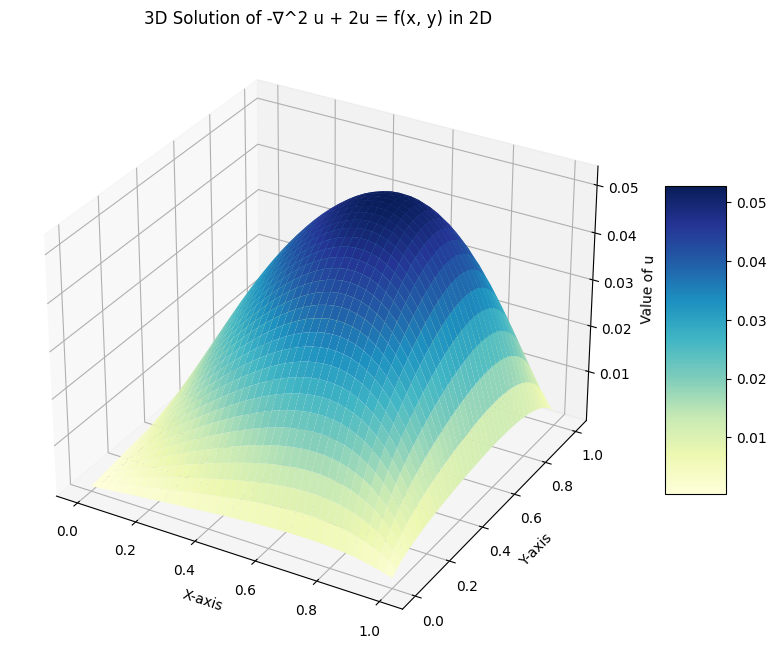

In [103]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, u, cmap='YlGnBu', edgecolor='none')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Value of u')
ax.set_title('3D Solution of -∇^2 u + 2u = f(x, y) in 2D')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
